<a href="https://colab.research.google.com/github/alexnehc/cs661final/blob/main/cs661final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [8]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
df_cleaned = df.dropna()
df_cleaned.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X_income = df_cleaned[['median_income']]
y_house_value = df_cleaned['median_house_value']

X_train_income, X_test_income, y_train_house_value, y_test_house_value = \
    train_test_split(X_income, y_house_value, test_size=0.2, random_state=42)

income_model = LinearRegression()
income_model.fit(X_train_income, y_train_house_value)

preds_house_value = income_model.predict(X_test_income)

mse_income = mean_squared_error(y_test_house_value, preds_house_value)
r2_income = r2_score(y_test_house_value, preds_house_value)

print(f"Linear Regression (Median Income vs. Median House Value):")
print(f"  Mean Squared Error: {mse_income:.2f}")
print(f"  R-squared: {r2_income:.2f}")

Linear Regression (Median Income vs. Median House Value):
  Mean Squared Error: 7221011204.24
  R-squared: 0.47


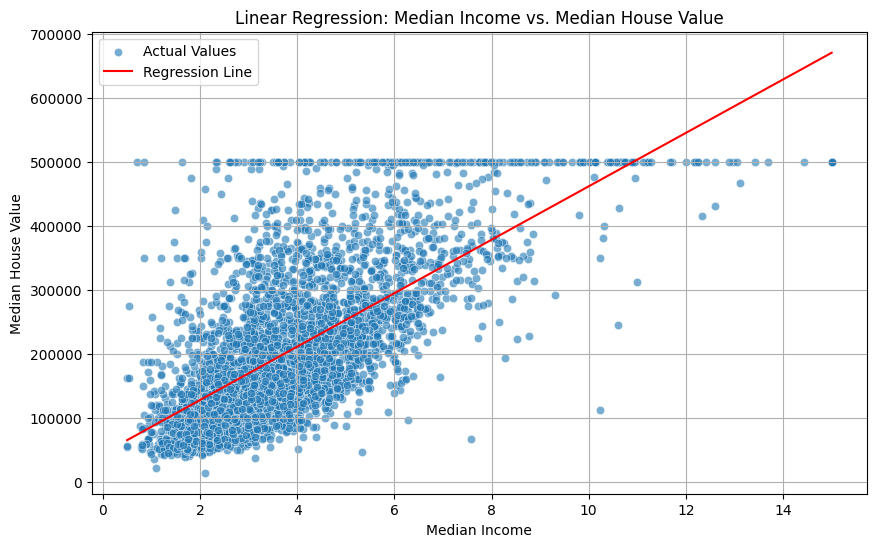

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_income['median_income'], y=y_test_house_value, label='Actual Values', alpha=0.6)
sns.lineplot(x=X_test_income['median_income'], y=preds_house_value, color='red', label='Regression Line')

plt.title('Linear Regression: Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.grid(True)
plt.show()

**Logistic Regression**

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [11]:
X = df_cleaned.drop('ocean_proximity', axis=1)
y = df_cleaned['ocean_proximity']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

log_preds = log_model.predict(X_test)

accuracy = accuracy_score(y_test, log_preds)
report = classification_report(y_test, log_preds)

print(f"Accuracy Score: {accuracy:.2f}")
print("\nClassification Report:")
print(report)

Accuracy Score: 0.64

Classification Report:
              precision    recall  f1-score   support

   <1H OCEAN       0.60      0.88      0.71      1803
      INLAND       0.75      0.77      0.76      1340
      ISLAND       0.00      0.00      0.00         2
    NEAR BAY       0.23      0.03      0.05       428
  NEAR OCEAN       0.00      0.00      0.00       514

    accuracy                           0.64      4087
   macro avg       0.32      0.34      0.30      4087
weighted avg       0.53      0.64      0.57      4087



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

Decision Tree Accuracy Score: 0.97

Decision Tree Classification Report:
              precision    recall  f1-score   support

   <1H OCEAN       0.97      0.97      0.97      1803
      INLAND       0.99      0.99      0.99      1340
      ISLAND       1.00      1.00      1.00         2
    NEAR BAY       0.98      0.99      0.98       428
  NEAR OCEAN       0.93      0.93      0.93       514

    accuracy                           0.97      4087
   macro avg       0.97      0.97      0.97      4087
weighted avg       0.97      0.97      0.97      4087



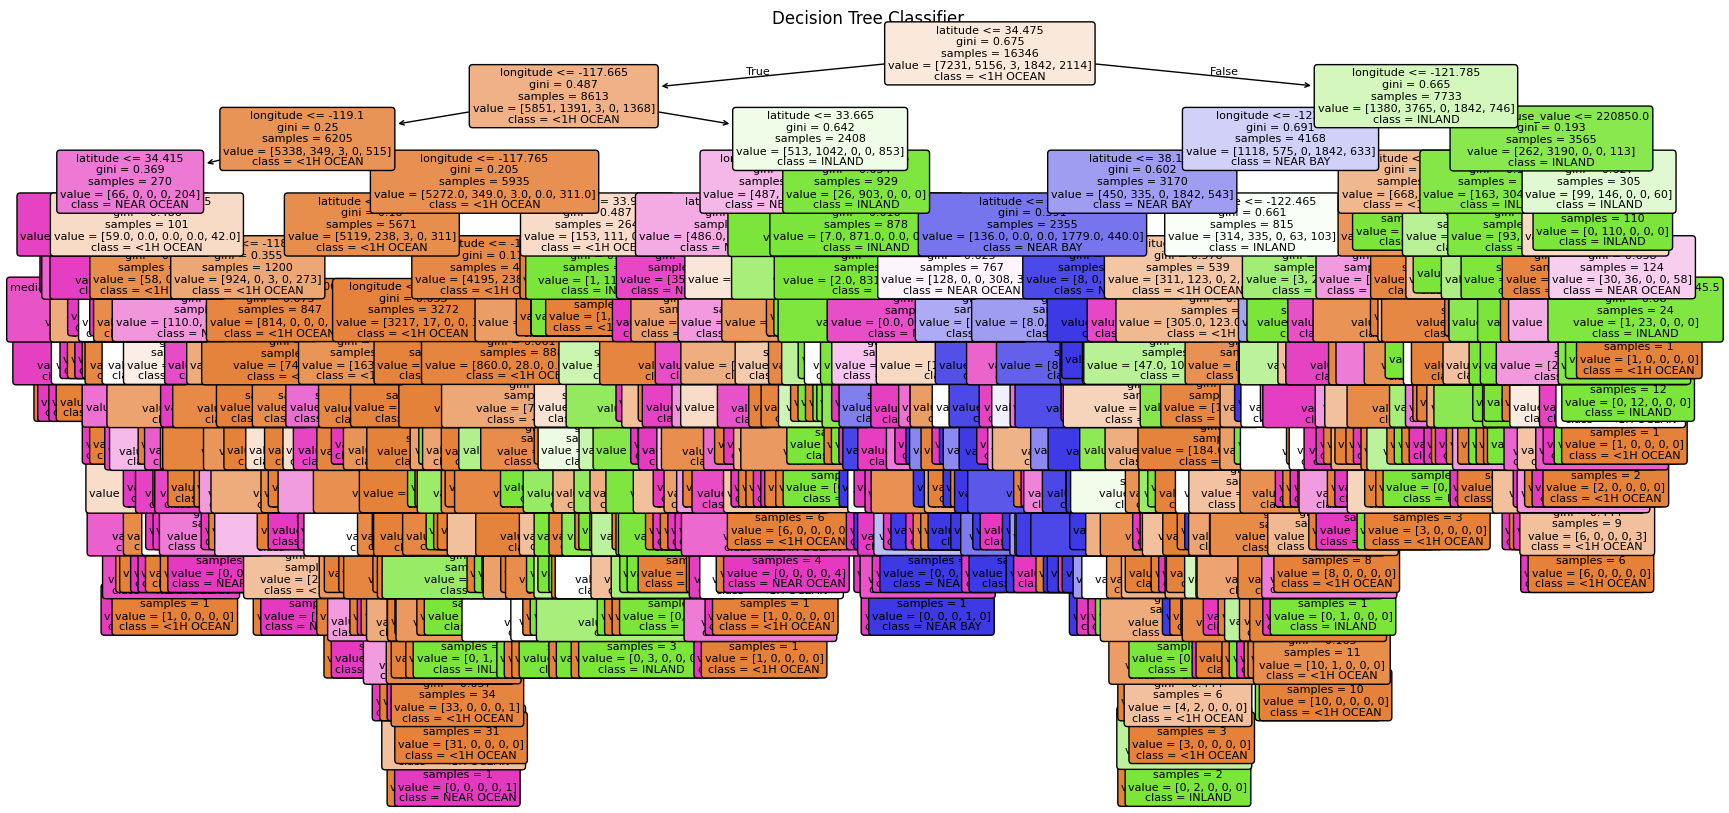

Decision Tree Accuracy Score: 0.97

Decision Tree Classification Report:
              precision    recall  f1-score   support

   <1H OCEAN       0.97      0.97      0.97      1803
      INLAND       0.99      0.99      0.99      1340
      ISLAND       1.00      1.00      1.00         2
    NEAR BAY       0.98      0.99      0.98       428
  NEAR OCEAN       0.93      0.93      0.93       514

    accuracy                           0.97      4087
   macro avg       0.97      0.97      0.97      4087
weighted avg       0.97      0.97      0.97      4087



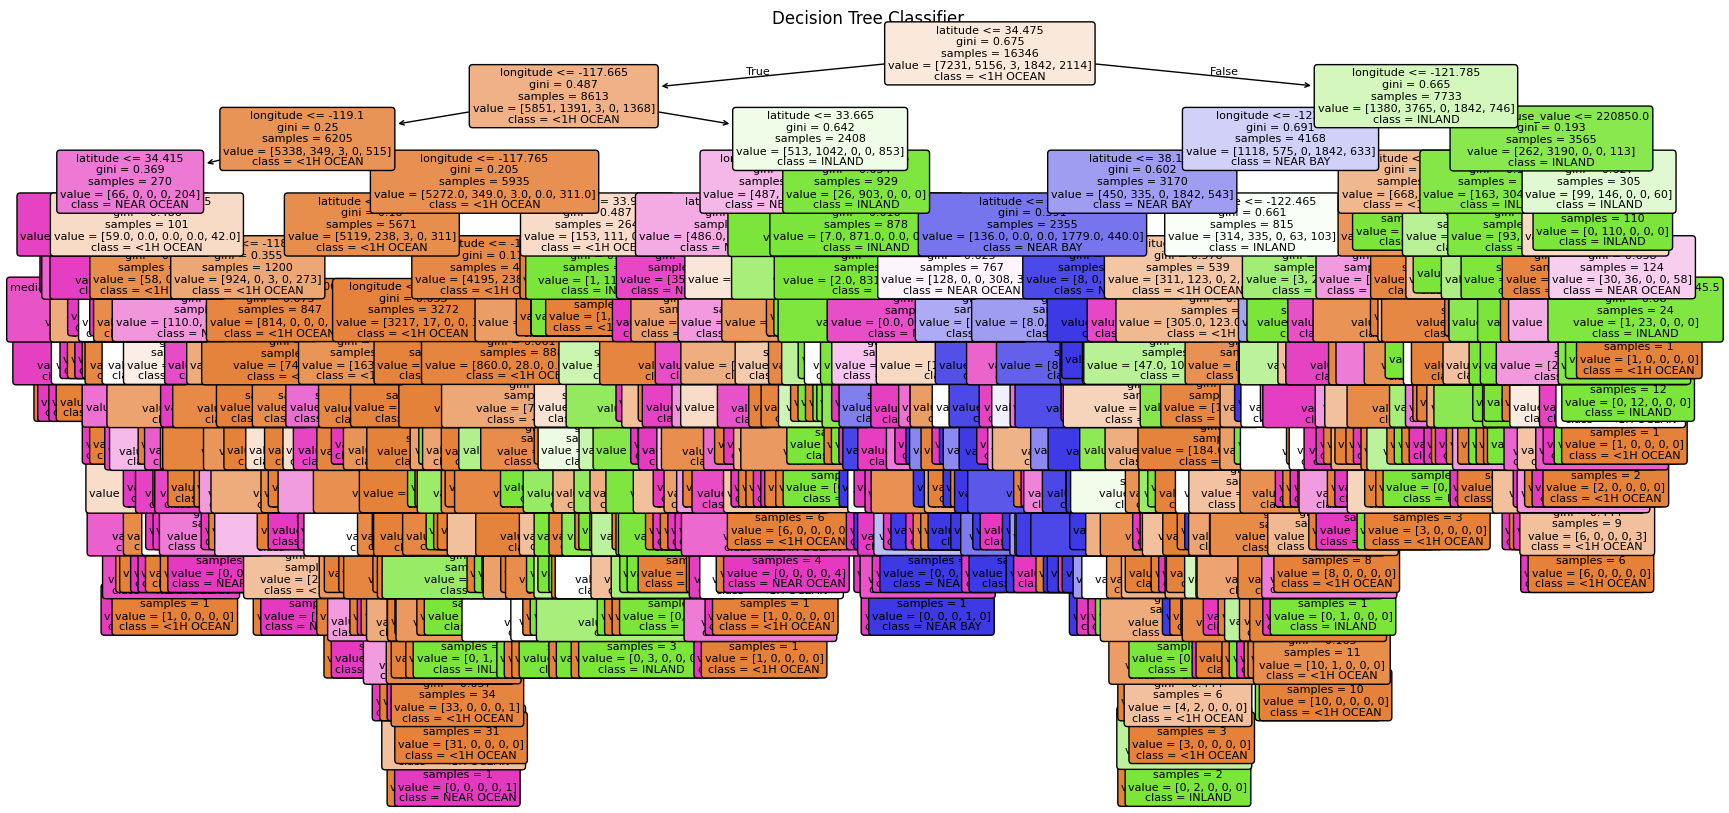

In [ ]:
X_dt = df_cleaned.drop('ocean_proximity', axis=1)
y_dt = df_cleaned['ocean_proximity']

X_dt = pd.get_dummies(X_dt, drop_first=True)

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.2, random_state=42)

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_dt, y_train_dt)

decision_tree_preds = decision_tree_model.predict(X_test_dt)

accuracy_dt = accuracy_score(y_test_dt, decision_tree_preds)
report_dt = classification_report(y_test_dt, decision_tree_preds)

print(f"Decision Tree Accuracy Score: {accuracy_dt:.2f}")
print("\nDecision Tree Classification Report:")
print(report_dt)

plt.figure(figsize=(20,10))
plot_tree(decision_tree_model, feature_names=X_dt.columns, class_names=decision_tree_model.classes_, filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree Classifier")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


New Decision Tree Accuracy Score (max_depth=4): 0.83

New Decision Tree Classification Report (max_depth=4):
              precision    recall  f1-score   support

   <1H OCEAN       0.87      0.83      0.85      1803
      INLAND       0.86      0.91      0.89      1340
      ISLAND       0.00      0.00      0.00         2
    NEAR BAY       0.75      0.97      0.84       428
  NEAR OCEAN       0.64      0.48      0.55       514

    accuracy                           0.83      4087
   macro avg       0.62      0.64      0.63      4087
weighted avg       0.82      0.83      0.82      4087



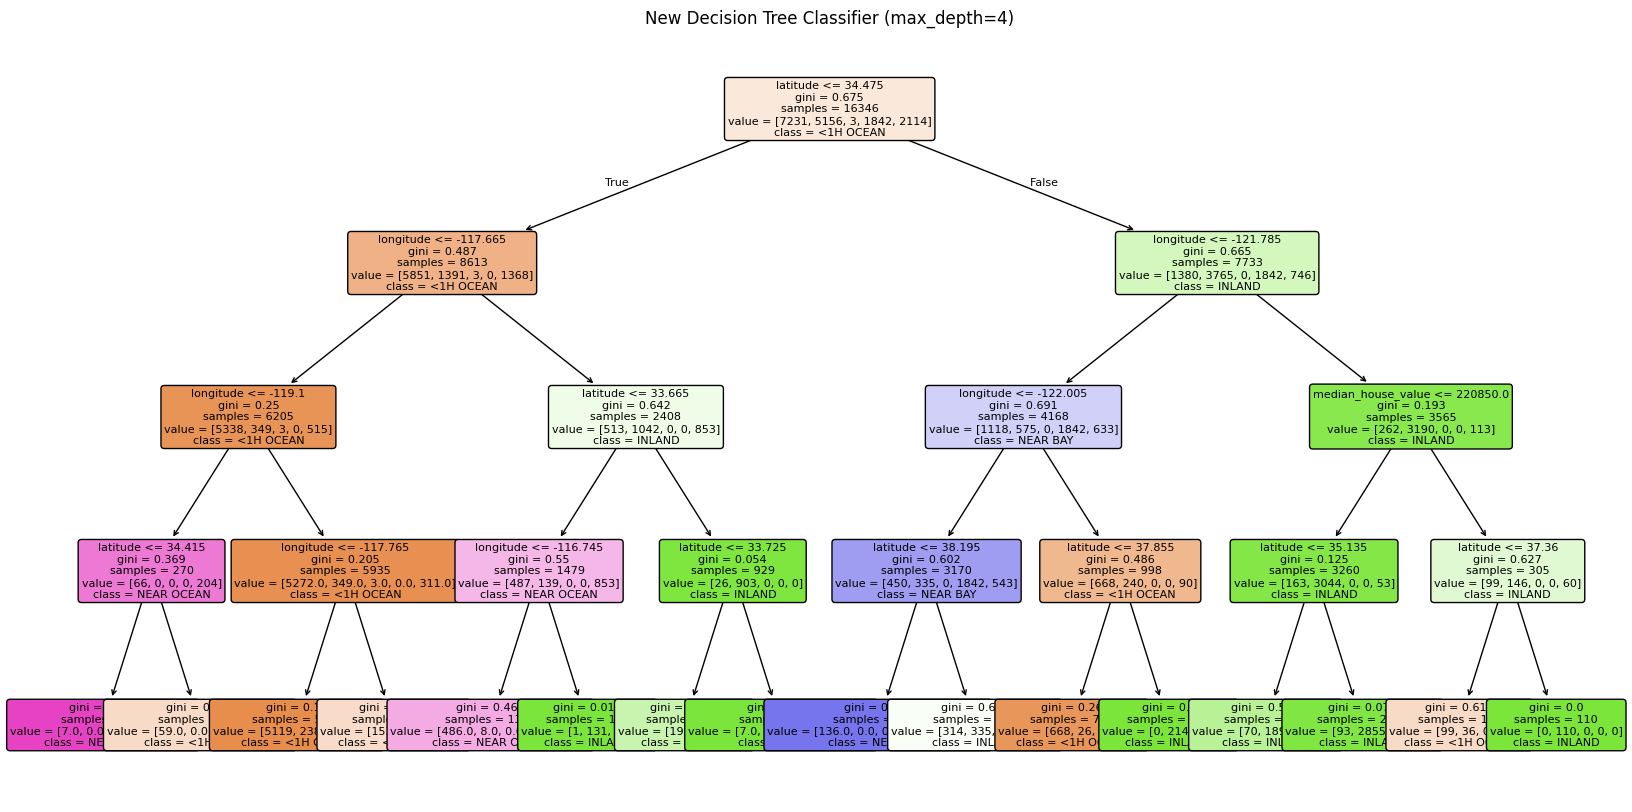

In [ ]:
X_dt_new = df_cleaned.drop('ocean_proximity', axis=1)
y_dt_new = df_cleaned['ocean_proximity']

X_dt_new = pd.get_dummies(X_dt_new, drop_first=True)


X_train_dt_new, X_test_dt_new, y_train_dt_new, y_test_dt_new = \
    train_test_split(X_dt_new, y_dt_new, test_size=0.2, random_state=42)

decision_tree_model_new = DecisionTreeClassifier(random_state=42, max_depth=4)
decision_tree_model_new.fit(X_train_dt_new, y_train_dt_new)


decision_tree_preds_new = decision_tree_model_new.predict(X_test_dt_new)


accuracy_dt_new = accuracy_score(y_test_dt_new, decision_tree_preds_new)
report_dt_new = classification_report(y_test_dt_new, decision_tree_preds_new)

print(f"New Decision Tree Accuracy Score (max_depth=4): {accuracy_dt_new:.2f}")
print("\nNew Decision Tree Classification Report (max_depth=4):")
print(report_dt_new)

plt.figure(figsize=(20,10))
plot_tree(decision_tree_model_new, feature_names=X_dt_new.columns, class_names=decision_tree_model_new.classes_, filled=True, rounded=True, fontsize=8)
plt.title("New Decision Tree Classifier (max_depth=4)")
plt.show()

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [ ]:
X_rf = df_cleaned.drop('ocean_proximity', axis=1)
y_rf = df_cleaned['ocean_proximity']

X_rf = pd.get_dummies(X_rf, drop_first=True)

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_rf, y_train_rf)

random_forest_preds = random_forest_model.predict(X_test_rf)

accuracy_rf = accuracy_score(y_test_rf, random_forest_preds)
report_rf = classification_report(y_test_rf, random_forest_preds)

print(f"Random Forest Accuracy Score: {accuracy_rf:.2f}")
print("\nRandom Forest Classification Report:")
print(report_rf)

Random Forest Accuracy Score: 0.97

Random Forest Classification Report:
              precision    recall  f1-score   support

   <1H OCEAN       0.97      0.98      0.98      1803
      INLAND       0.99      0.98      0.99      1340
      ISLAND       0.00      0.00      0.00         2
    NEAR BAY       0.97      0.99      0.98       428
  NEAR OCEAN       0.95      0.91      0.93       514

    accuracy                           0.97      4087
   macro avg       0.78      0.77      0.77      4087
weighted avg       0.97      0.97      0.97      4087



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


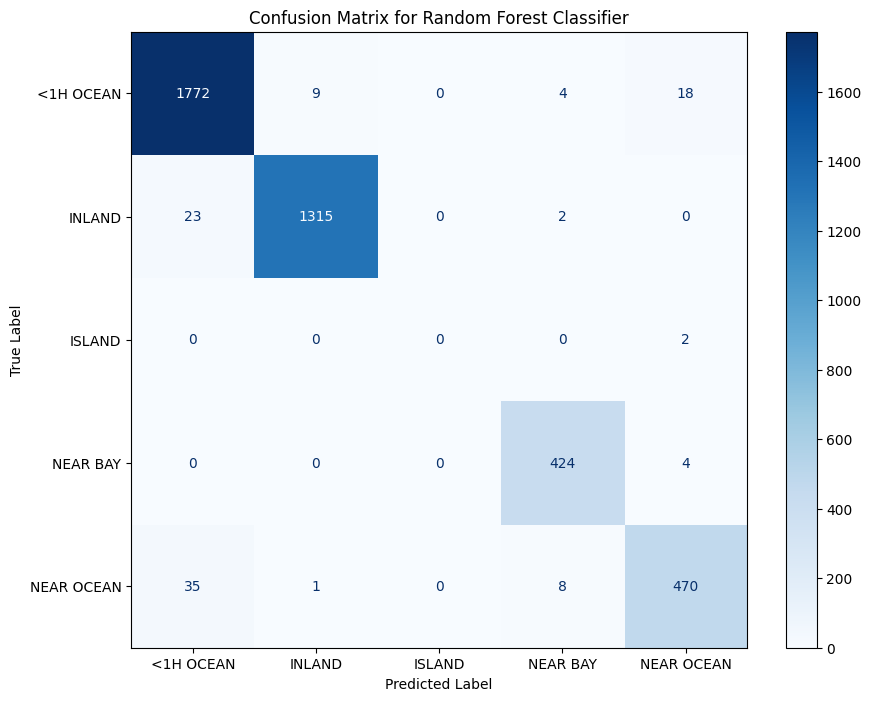

In [ ]:
cm_rf = confusion_matrix(y_test_rf, random_forest_preds)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=random_forest_model.classes_)

fig_rf, ax_rf = plt.subplots(figsize=(10, 8))
disp_rf.plot(cmap=plt.cm.Blues, ax=ax_rf)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)
plt.show()